# ギャンブル課題
簡単な強化学習のモデル

問
$$
一枚一枚にランダムな金額が書かれたカードを1回500円で引く． \\
何度か引くことでこのゲームに参加するのが得か損かを判断するエージェントを作成したい．
$$

このエージェントが現時点で予想するカードの平均的な価値を$Q$円とする．
この予想はカードを引くごとに更新するので，ある時点$t$における平均的な価値を$Q_t$とする．
最初は$Q_0 = 500$とする．

このエージェントは，引いた金額が予想より高ければ予想を上方修正し，低ければ下方修正する．
時刻$t$に引いた金額を$r_t$とすると，予想との誤差は$(r_t - Q_t)$とかける．
この誤差に比例する量を次の時刻の予想値に反映して，以下の式を作る．

$$
Q_{t+1} = Q_t + \alpha (r_t - Q_t)
$$

## シミュレーションの状況
カードは0円から2000円までの離散型一様分布に従って生成されるルールで，$t=100$回まで行う．
係数$\alpha = 0.05$として，行う．

一様分布の期待値は
$$
E(X) = (N+1)/2
$$
より
$N=(2000 - 0) + 1 = 2001$
なので，
期待値は1000.5円である．

実際に，エージェントが真の期待値を予想できるか確認してみる．

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set_style('darkgrid')

In [ ]:
# 実際に出たカード(お金)
# すなわち報酬
np.random.seed(seed=42)
rewords = np.random.randint(0, 2000, 100)
rewords

In [ ]:
# 回数のための変数
time = list(range(0, 100, 1))

In [ ]:
# 予想する価値の配列を獲得する
Q = np.zeros(100)

In [ ]:
# 係数
a = 0.05

In [ ]:
for t in time:
    if t == 0:    # Q[-1]が取れないので，別途指定
        Q[t] = 500 + a*(rewords[t] - 500)
        continue
    Q[t] = Q[t-1] + a*(rewords[t] - Q[t-1])


In [ ]:
Q

In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel('t')
ax.set_ylabel('price of card')
ax.axhline(y=1000.5)    # すでに知っている期待値．
ax.plot(time, rewords, color='red', label='card')
ax.plot(time, Q, color='green', label='agent')
plt.show()

緑色の線がモデルが予測した期待値で，おおよそ青色の線に従っているので，期待値を精度良く予測できている．


関数化する

In [60]:
def GambleTask(rewards, expectation, cnt=100, a=0.05):
    Q = np.zeros(cnt)
    Qinit = rewards[0]
    cnt = list(range(0, cnt, 1))
    for c in cnt:
        if c == 0:
            Q[0] = Qinit + a*(rewards[c] - Qinit)
            continue
        Q[c] = Q[c-1] + a*(rewords[c] - Q[c-1])
    
    # グラフ
    fig, ax = plt.subplots()
    ax.set_xlabel('count')
    ax.set_ylabel('price of card')
    ax.axhline(y=expectation)    # すでに知っている期待値．
    ax.plot(cnt, rewards, color='red', label='card')
    ax.plot(cnt, Q, color='green', label='agent')
    plt.legend()
    plt.show()


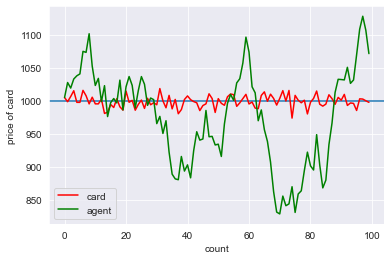

In [61]:
np.random.seed(seed=42)
rewards = np.random.normal(loc=1000, scale=10, size=100)
GambleTask(rewards=rewards, expectation=1000)

In [62]:
np.random.seed(seed=42)
rewards2 = np.random.randint(0, 3000, 100)
rewards2

array([ 860, 1294, 1130, 1095, 1638, 2169,  466, 1238,  330, 1482, 2135,
       2919,  130, 1685,  769, 2391, 1515, 2853, 2433, 1215,  955, 2324,
       1184,  459,   21, 2300,  747, 2904,  474, 1082, 2558, 2047, 2747,
        975, 1806,  189, 2734,  562, 1899, 1267, 2879, 1528,  646, 2068,
       2888, 2214, 1297, 2435,  600, 2363, 2061,  241, 2041, 2824, 2612,
       2945, 1363, 2139, 1390, 1478, 2556,  775,   34, 2253, 1955, 1585,
       1021, 2613, 1129, 1500,  702, 2449, 2777, 1579,  161,  201, 1981,
        995, 2317,  815,  455, 1275, 1016, 2343, 2767,  337,  878, 1076,
        791, 2264,  763, 2235,  379,  492, 1180, 2062,   64, 2568, 1367,
       1152])

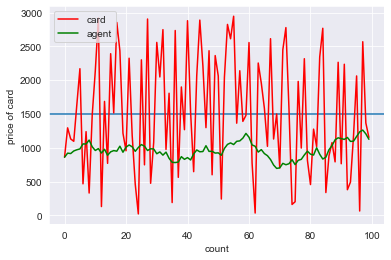

In [63]:
GambleTask(rewards=rewards2, expectation=(3000-0+1)/2, a=0.1)

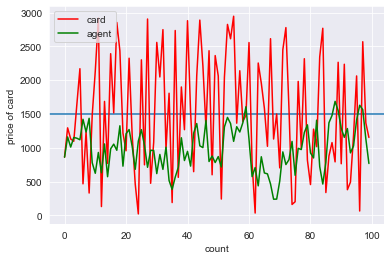

In [65]:
GambleTask(rewards=rewards2, expectation=(3000-0+1)/2, a=0.5)

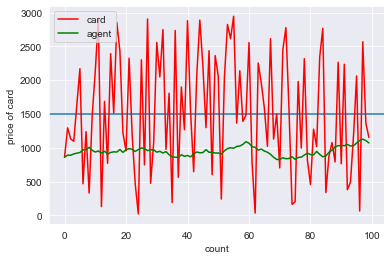

In [66]:
GambleTask(rewards=rewards2, expectation=(3000-0+1)/2, a=0.05)

場合によっては初期値からあまり推移せずにおわってしまう．
今回試した，0-3000の一様分布の場合はそうなった．
学習係数を上げすぎると，それぞれのデータに合わせてしまいがちになるし，低すぎるとデータ数が不十分の場合十分に合致しないことがわかる．

単純なモデルなのでそういう面があるのは仕方ないことだと思う．
